In [1]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('/content/athlete_events.csv')

In [2]:
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


# Existe uma idade onde se ganha mais medalhas?

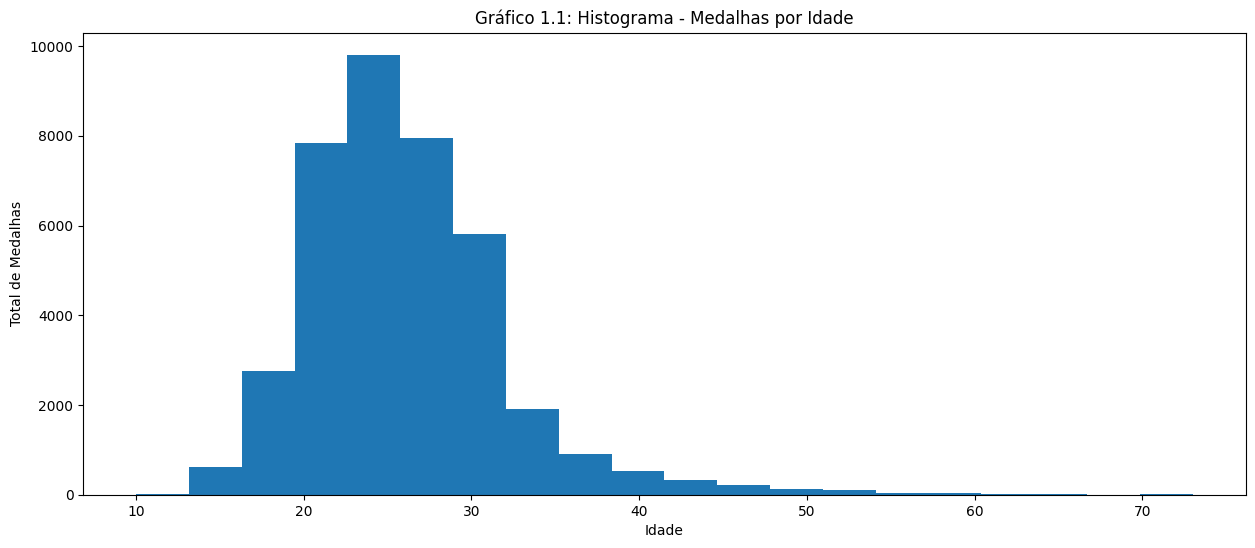

In [3]:
medalhas_por_idade = df[df['Medal'].notnull()].groupby('Age')['Medal'].count().reset_index()
idades = medalhas_por_idade['Age']
total_medalhas = medalhas_por_idade['Medal']

# Histograma
plt.figure(figsize=(15, 6))
plt.hist(idades, bins=20, weights=total_medalhas)
plt.xlabel('Idade')
plt.ylabel('Total de Medalhas')
plt.title('Gráfico 1.1: Histograma - Medalhas por Idade')
plt.grid(False)
plt.show()

# Gráfico de barras interativo
fig = go.Figure(data=[go.Bar(x=idades, y=total_medalhas)])
fig.add_annotation(
    x=50, y=2600, 
    text='Atletas que possuem entre 19 e 31 anos conseguiram 81.34% do total de medalhas',  
    showarrow=False, 
    font=dict(size=12) 
)

cores = ['green' if 19 <= idade <= 31 else 'gray' for idade in idades]
fig.update_layout(xaxis_title='Idade', yaxis_title='Total de Medalhas', title='Gráfico 1.2: Gráfico de barras - Medalhas por Idade')
fig.update_traces(hovertemplate='%{x} anos; %{y} medalhas', marker=dict(color=cores))
fig.show()

In [4]:

medalhas_19_31 = medalhas_por_idade[(medalhas_por_idade['Age'] >= 19) & (medalhas_por_idade['Age'] <= 31)]['Medal'].sum()
total_medalhas = medalhas_por_idade['Medal'].sum()
porcentual_19_31 = (medalhas_19_31 / total_medalhas) * 100


print('A partir dos gráficos apresentados, 23 anos é a idade que tem mais medalhistas.')
print(f'Além disso, atletas que possuem entre 19 e 31 anos conseguiram {porcentual_19_31:.2f}% do total de medalhas')

A partir dos gráficos apresentados, 23 anos é a idade que tem mais medalhistas.
Além disso, atletas que possuem entre 19 e 31 anos conseguiram 81.34% do total de medalhas


# Como é a distribuição de idade por esporte?

In [5]:
sub_df = df.loc[:, ['Age', 'Sport', 'Medal']].dropna()

fig = px.box(sub_df, y='Sport', x='Age', orientation='h')

fig.update_layout(
    title='Gráfico 1.3: Distribuição de Idades dos medalhistas por Esporte',
    yaxis_title='Esporte',
    xaxis_title='Idade',
    height=1200
)
fig.show()


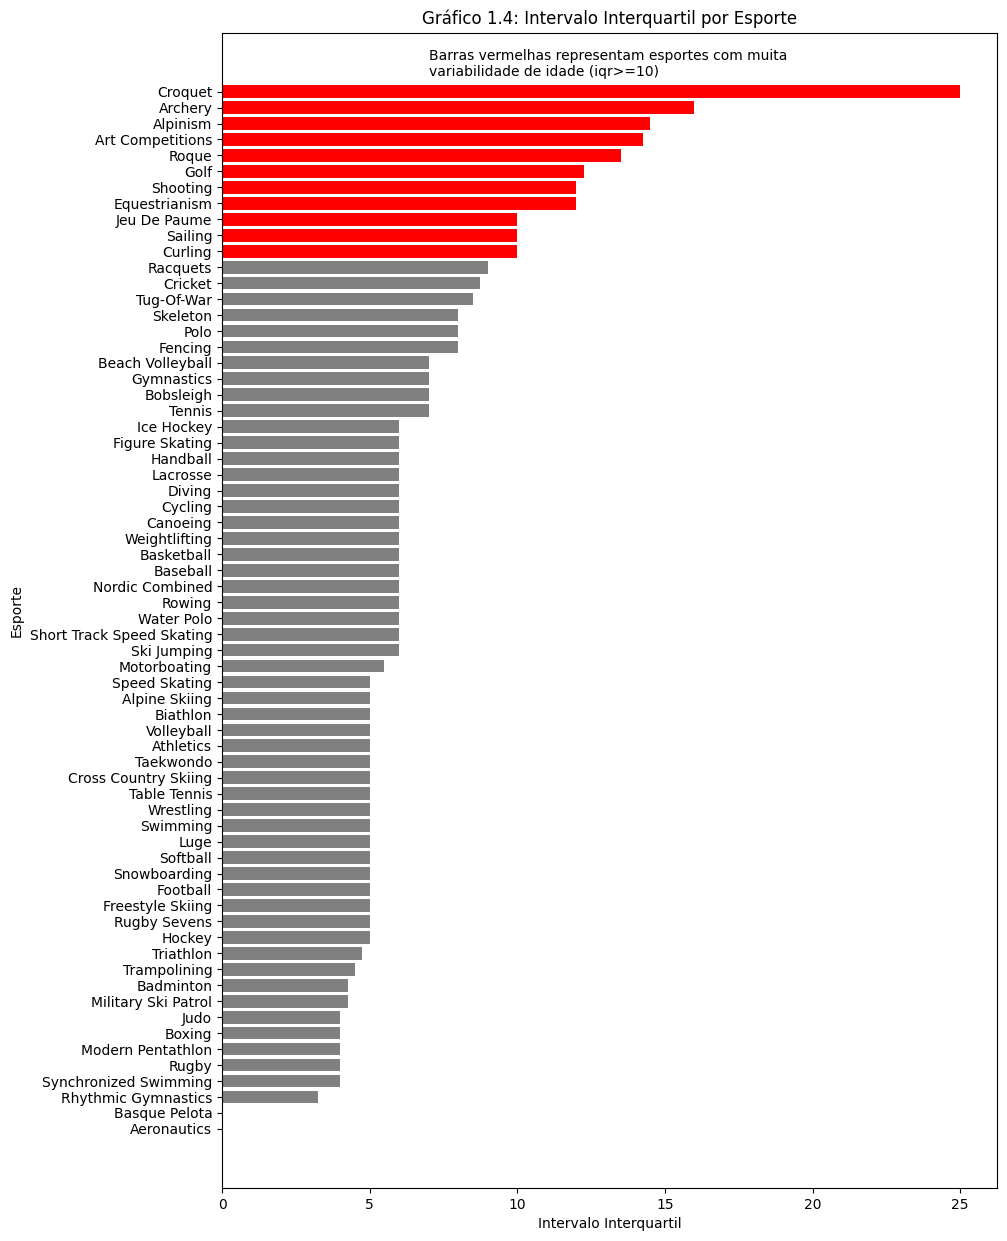

In [6]:
import numpy as np


sub_df = df.loc[:, ['Age', 'Sport', 'Medal']].dropna()


iqr_data = sub_df.groupby('Sport')['Age'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25)).reset_index()
iqr_data = iqr_data.rename(columns={'Age': 'Intervalo Interquartil'})
iqr_data = iqr_data.sort_values('Intervalo Interquartil')

cores = ['red' if iqr>=10 else 'gray' for iqr in iqr_data['Intervalo Interquartil']]
plt.figure(figsize=(10, 15))
plt.barh(iqr_data['Sport'], iqr_data['Intervalo Interquartil'], color=cores)
plt.xlabel('Intervalo Interquartil')
plt.ylabel('Esporte')
plt.title('Gráfico 1.4: Intervalo Interquartil por Esporte')
plt.grid(False)

plt.annotate(
    'Barras vermelhas representam esportes com muita\nvariabilidade de idade (iqr>=10)', 
    xy=(7, 66), 
    fontsize=10  
)



plt.show()



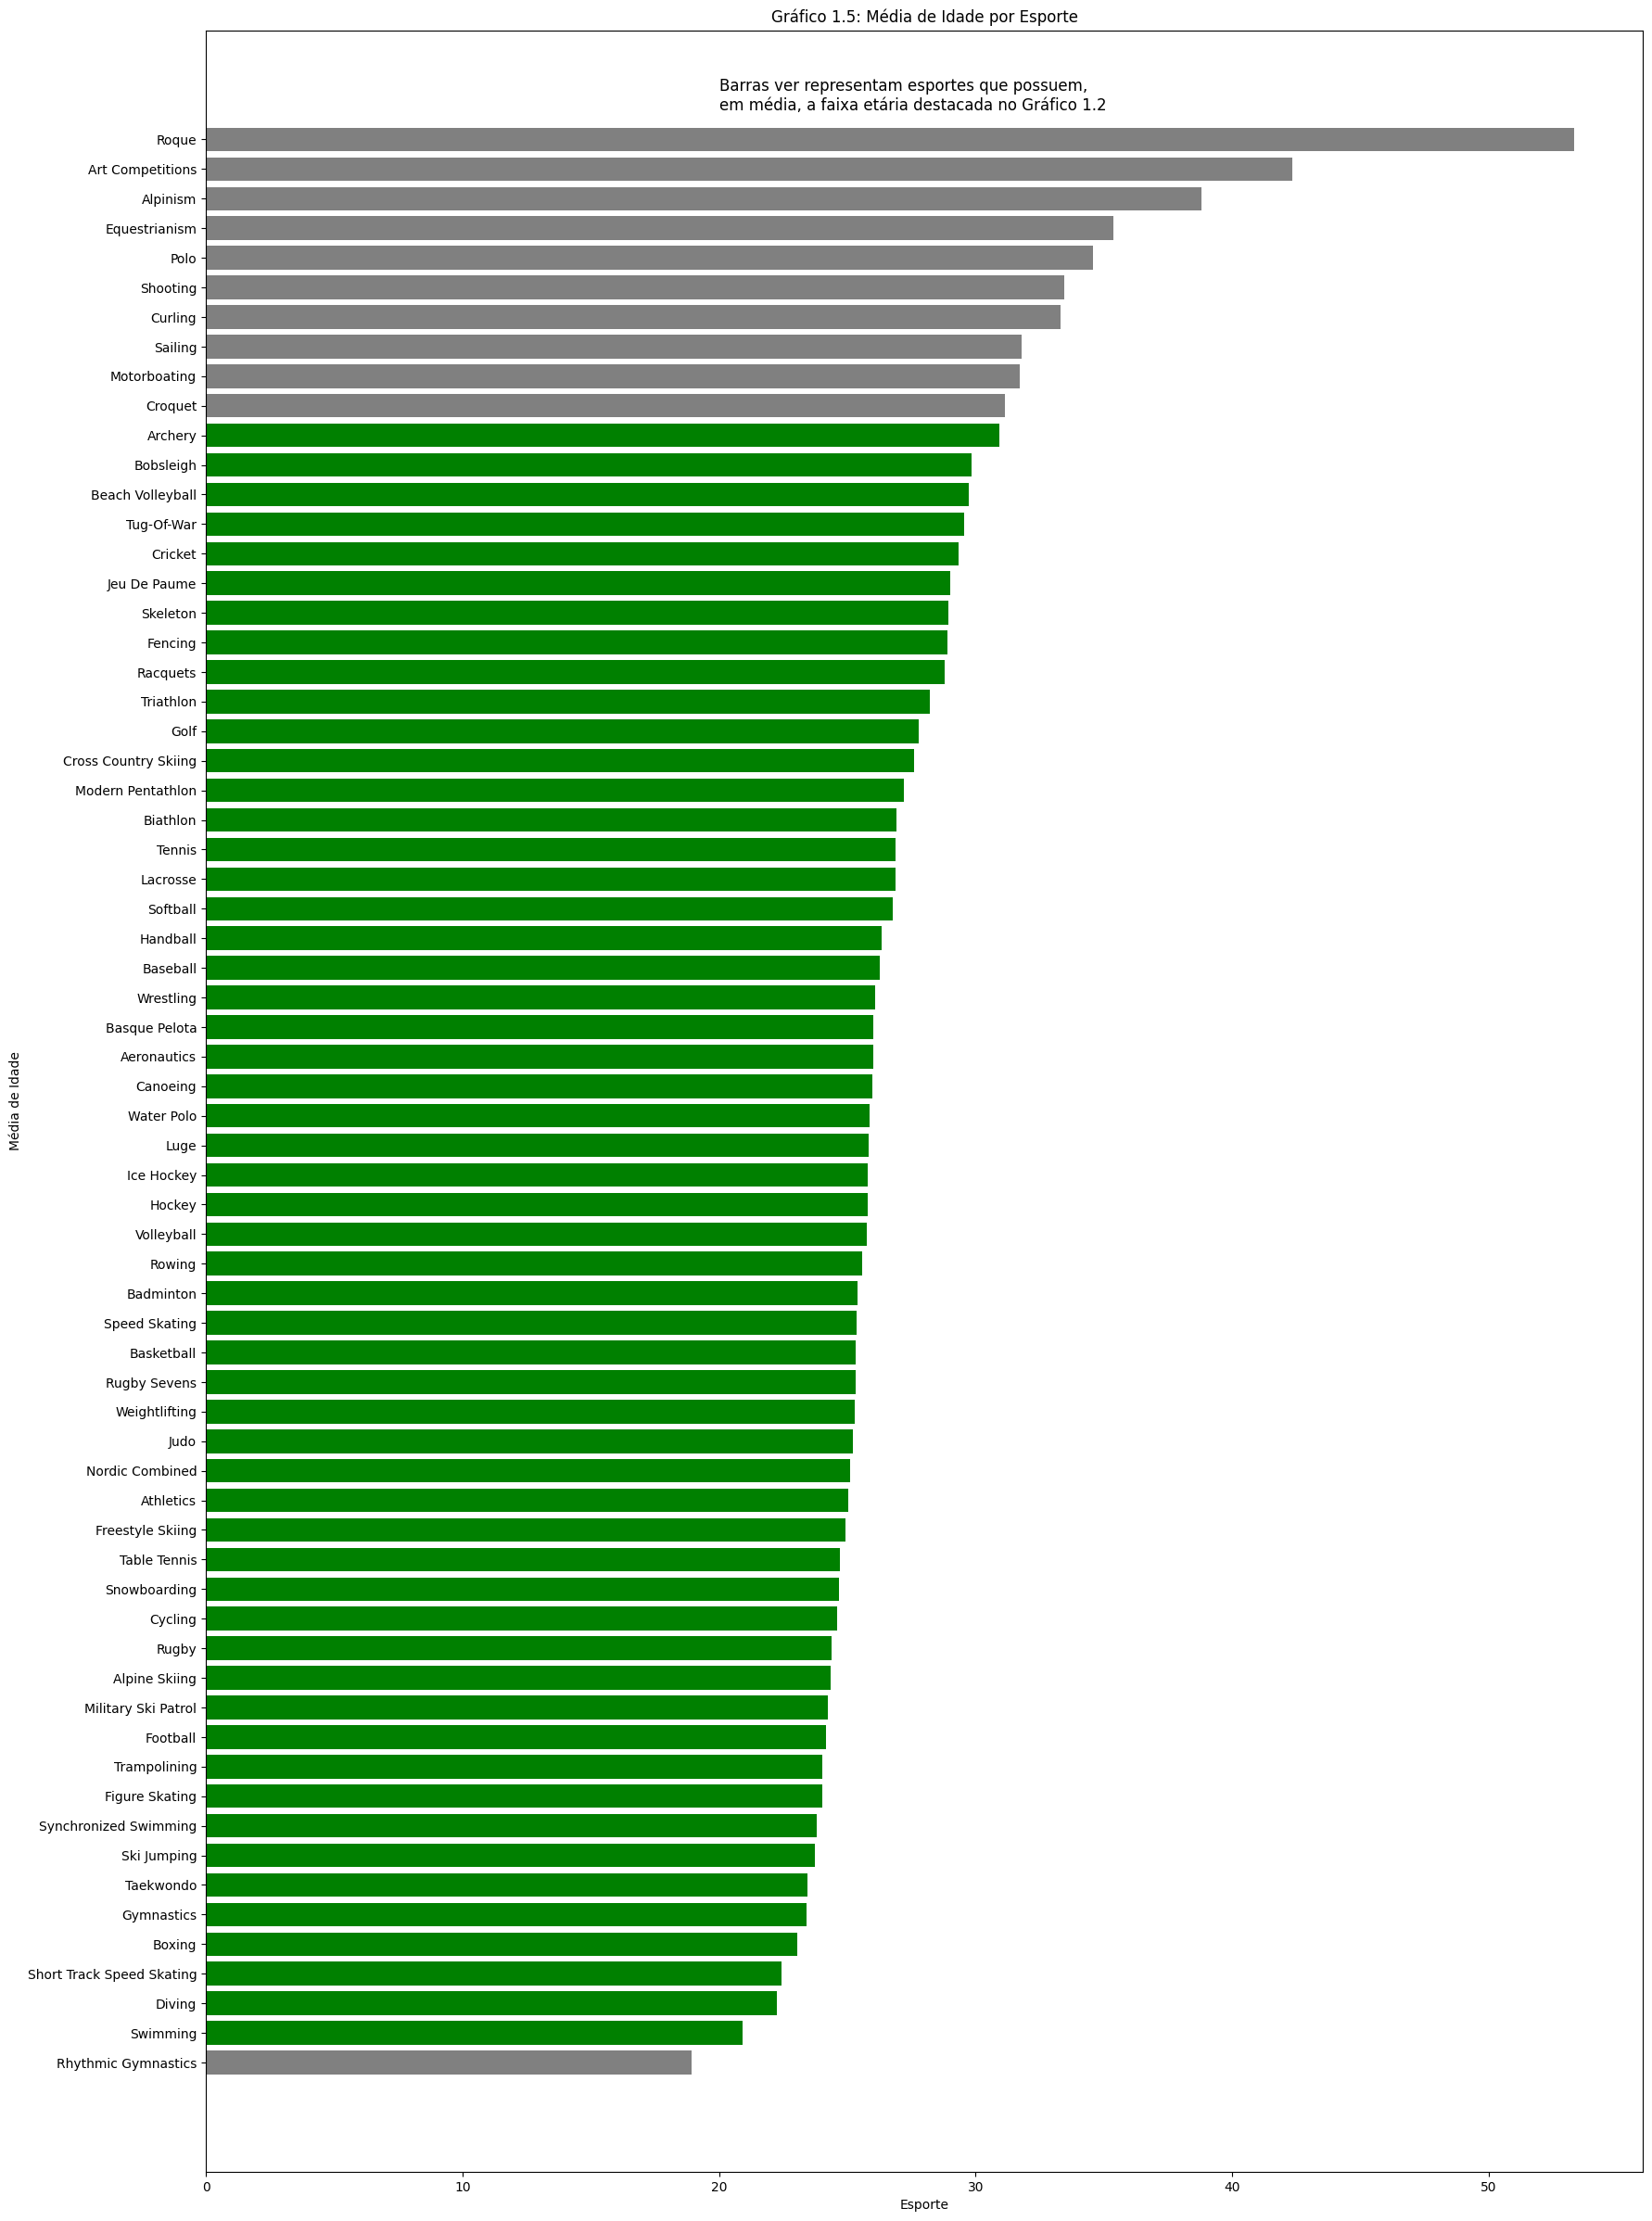

In [7]:
mean_data = sub_df.groupby('Sport')['Age'].mean().reset_index()
mean_data = mean_data.sort_values('Age')

plt.figure(figsize=(20, 30))
cores = ['green' if 19 <= idade <= 31 else 'gray' for idade in mean_data['Age']]
plt.barh(mean_data['Sport'], mean_data['Age'], color=cores)
plt.xlabel('Esporte')
plt.ylabel('Média de Idade')
plt.title('Gráfico 1.5: Média de Idade por Esporte')

plt.grid(False)


plt.annotate(
    'Barras ver representam esportes que possuem, \nem média, a faixa etária destacada no Gráfico 1.2',
    xy=(20, 66), 
    fontsize=12  
)


plt.show()
